# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Introduction and Business Problem

**Introduction:**
- Berlin is Germany is a big city with twelve boroughs that are made up of a total of 96 officially recognized localities. There are some upcoming neighborhood which are packed with restaurants, night life and hip people. For people that are new to Berlin it can be hard to figure out what restaurants are worth going to and where they are. For people that used to live in Berlin or are visiting, how do they know what's the best places to get some good food or drinks?
    
    
    
**Business Problem:**
- For this project, I am going to create a simple guide on where to eat based on Foursquare ratings, price, category and geographic location data for restaurants in Berlin. I will then cluster these restaurants based on their similarities so that a user can easily check out what kind of food they are looking for and in what price range.    

## Data Required

For this assignment, I will be utilizing the Foursquare API to pull the following location data on restaurants in Berlin, Germany:
- Venue Name
- Venue ID
- Venue Location
- Venue Category
- Rating
- Price


## Data Acquisition Approach

To acquire the data mentioned above, I will need to do the following:

- Get geolocator lat and long coordinates for Berlin, Germany
- Get a list of all venues
- Get venue IDs for each venue
- Pull venue name, location, category, rating, price

## Data Usage Approach - Clustering

I will use the gathered data and create a k-means clustering algorithm that groups restaurants into 4-5 clusters so that people looking to eat in Berlin can easily see which restaurants will provide that food they are looking for.

## 1. Get the Data
### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### Define Foursquare credentials and version

In [2]:
CLIENT_ID = 'X0FZUCBWGJIBXFQLTLBZAYK44OMASVPVK0J5IAUZVN5K3PJ0' # your Foursquare ID
CLIENT_SECRET = 'ZKW4AS4C3FTOQLCVHIJQOT05QSKVNOEZZDRWFDOX3RULDEWC' # your Foursquare Secret
ACCESS_TOKEN = '4GNWIASCMP00QL1KJAWT1GO2L0QEMW5RDH0IBLGBK1NIBUZE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X0FZUCBWGJIBXFQLTLBZAYK44OMASVPVK0J5IAUZVN5K3PJ0
CLIENT_SECRET:ZKW4AS4C3FTOQLCVHIJQOT05QSKVNOEZZDRWFDOX3RULDEWC


### Read Excel with the name of the neighborhoods of each borough in Berlin

In [3]:
#read excel with panda function
df_berlin_neigh = pd.read_excel('Berlin_Borough_Neighborhoods.xlsx')
print(df_berlin_neigh.shape)
df_berlin_neigh.head()

(96, 2)


,Borough,Neighborhoods
0,Mitte,Mitte
1,Mitte,Tiergarten
2,Mitte,Wedding
3,Mitte,Moabit
4,Mitte,Hansaviertel


### Use geopy library to get the latitude and longitude values of each neighborhood

In [4]:
# define the dataframe columns
column_names = ['Neighborhoods', 'Latitude', 'Longitude'] 

# instantiate the dataframe
coordinates_neigh = pd.DataFrame(columns=column_names)

for index, row in df_berlin_neigh.iterrows():
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(row['Neighborhoods'] + ', Berlin')
    latitude = location.latitude
    longitude = location.longitude
    coordinates_neigh = coordinates_neigh.append({
                                            'Neighborhoods': row['Neighborhoods'],
                                            'Latitude': latitude,
                                            'Longitude': longitude}, ignore_index=True)
    
coordinates_neigh

,Neighborhoods,Latitude,Longitude
0,Mitte,52.517885,13.404060
1,Tiergarten,52.509778,13.357260
2,Wedding,52.550123,13.341970
3,Moabit,52.530102,13.342542
4,Hansaviertel,52.519123,13.341872
5,Gesundbrunnen,52.550920,13.384846
6,Friedrichshain,52.512215,13.450290
7,Kreuzberg,52.497644,13.411914
8,Prenzlauer Berg,52.539847,13.428565
9,Weißensee,52.554619,13.463002


### Create map of neighborhoods using latitude and longitude values

In [5]:
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, district in zip(coordinates_neigh['Latitude'], coordinates_neigh['Longitude'], coordinates_neigh['Neighborhoods']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

## 2. Explore Neighborhoods 

### Create a function to get all venues in each neighborhood

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
        
       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods', 
                  'Neighborhoods Latitude', 
                  'Neighborhoods Longitude',
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
berlin_venues = getNearbyVenues(names=coordinates_neigh['Neighborhoods'],
                                   latitudes=coordinates_neigh['Latitude'],
                                   longitudes=coordinates_neigh['Longitude']
                                  )

Mitte
Tiergarten
Wedding
Moabit
Hansaviertel
Gesundbrunnen                                
Friedrichshain                                  
Kreuzberg
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
Stadtrandsiedlung Malchow            
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord                        
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld                        
Wilhelmstadt
Steglitz
Lichterfelde                                      
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg                                      
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Buckow
Rudow
Gropiusstadt                                      
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide                          
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpe

### Filter for restaurants in 'Venue Category'
There are 265 restaurants findable on Foursquare in Berlin

In [9]:
berlin_rest = berlin_venues[berlin_venues['Venue Category'].str.contains('Restaurant')]
print(berlin_rest.shape)
berlin_rest

(265, 8)


,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
15,Mitte,52.517885,13.404060,5a958ec0e4c459472938359f,Wilde Matilde,52.517475,13.405384,German Restaurant
17,Mitte,52.517885,13.404060,584c882dd702824c51e2be9a,Balthazar,52.515913,13.406160,Restaurant
27,Mitte,52.517885,13.404060,59eb78736bdee6069ed97d77,EL COLMADO,52.519412,13.409681,Spanish Restaurant
33,Tiergarten,52.509778,13.357260,4cc6c1d5c844721ea24ef601,Kantine im Felleshus,52.508555,13.350813,Scandinavian Restaurant
38,Tiergarten,52.509778,13.357260,4cdae7f2930af04dfbb08797,Eventlocation Alte Pumpe,52.505481,13.358203,German Restaurant
61,Moabit,52.530102,13.342542,5704ef8e498e01d01a38f46f,Habe die Ehre,52.528024,13.338907,Austrian Restaurant
65,Moabit,52.530102,13.342542,4b3675bcf964a520f03525e3,Lichtblick,52.532392,13.341196,Restaurant
68,Moabit,52.530102,13.342542,50b0c5c6e4b0a71212006b47,Alimentari e Vini,52.527793,13.338373,Italian Restaurant
71,Moabit,52.530102,13.342542,4bbe38a279eaef3b66daaec3,Dicker Engel,52.532382,13.340826,German Restaurant
75,Moabit,52.530102,13.342542,54df15c6498ed36be495c287,geh Veg,52.532178,13.342044,Vegetarian / Vegan Restaurant


### Get all the price and ratings for each restaurant with 'Venue ID'

In [10]:
berlin_rest_price = berlin_rest.copy()

# initialise values
berlin_rest_price['Rating'] = 0
berlin_rest_price['Price'] = 0 
# loop venues
for ind in np.arange(berlin_rest_price.shape[0]):
    br = berlin_rest_price.iloc[ind]
    brID = br['Venue ID']
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            brID, CLIENT_ID, CLIENT_SECRET, VERSION)
    try:
        results = requests.get(url).json() 
        berlin_rest_price.iloc[ind,8]=results['response']['venue']['rating']
        berlin_rest_price.iloc[ind,9]=results['response']['venue']['price']['tier']
        print(results['response']['venue']['name'] , ' Rating: ', results['response']['venue']['rating'], ' Price: ', results['response']['venue']['price']['tier'] )
    except:
        pass



Wilde Matilde  Rating:  7.4  Price:  2
Balthazar  Rating:  7.4  Price:  1
EL COLMADO  Rating:  7.7  Price:  1
Kantine im Felleshus  Rating:  7.5  Price:  2
Eventlocation Alte Pumpe  Rating:  5.9  Price:  2
Lichtblick  Rating:  7.5  Price:  1
Alimentari e Vini  Rating:  7.9  Price:  2
Dicker Engel  Rating:  7.3  Price:  2
geh Veg  Rating:  7.2  Price:  2
Naninka  Rating:  7.5  Price:  1
Valladares  Rating:  8.0  Price:  2
Marjan Grill  Rating:  8.4  Price:  2
Keyfi Sefa Berlin  Rating:  5.8  Price:  1
DaGiorgio's  Rating:  8.0  Price:  2
Yöre Gözleme ve Manti Evi  Rating:  8.4  Price:  1
Shalimar Restaurant  Rating:  7.7  Price:  2
Baldon  Rating:  7.8  Price:  1
Imren Grill  Rating:  8.0  Price:  1
Altin Saray  Rating:  7.1  Price:  1
Oase  Rating:  8.8  Price:  1
goodies  Rating:  8.2  Price:  2
Akkawy  Rating:  8.5  Price:  2
Trattoria Portofino  Rating:  7.6  Price:  2
Fatoush  Rating:  8.7  Price:  2
Picoteo  Rating:  9.0  Price:  2
Obermaier Restaurant-Salon  Rating:  8.7  Price: 

### Check how many restaurants were actually rated by price an qualitiy

Only 42 got a price rating and 47 a rating of the food quality out of 265 restaurants --> No further usage of prices and ratings for clustering. Just categories.

In [11]:
print(berlin_rest_price[berlin_rest_price['Price'] > 0].shape)
print(berlin_rest_price[berlin_rest_price['Rating'] > 0].shape)
print(berlin_rest.shape)

(42, 10)
(47, 10)
(265, 8)


### Group the results by 'Venue Category'
Group the results to see how many different types of restaurants there are

In [12]:
berlin_rest.groupby('Venue Category').count()

,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,
African Restaurant,1,1,1,1,1,1,1
American Restaurant,2,2,2,2,2,2,2
Argentinian Restaurant,1,1,1,1,1,1,1
Asian Restaurant,8,8,8,8,8,8,8
Austrian Restaurant,2,2,2,2,2,2,2
Bavarian Restaurant,1,1,1,1,1,1,1
Cajun / Creole Restaurant,1,1,1,1,1,1,1
Chinese Restaurant,11,11,11,11,11,11,11
Comfort Food Restaurant,1,1,1,1,1,1,1


### Check 'Venue Category' with only 'Restaurant'
There are 22 Restaurant with no further specification. We are checking them to see what kind of types they could be.

In [129]:
berlin_rest[berlin_rest['Venue Category'] == 'Restaurant']

,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
17,Mitte,52.517885,13.404060,584c882dd702824c51e2be9a,Balthazar,52.515913,13.406160,Restaurant
67,Moabit,52.530102,13.342542,4b3675bcf964a520f03525e3,Lichtblick,52.532392,13.341196,Restaurant
129,Gesundbrunnen,52.550920,13.384846,5ba5ed2f5c6838002cc04516,Baldon,52.549120,13.381062,Restaurant
254,Stadtrandsiedlung Malchow,52.571019,13.463285,4e35547518a82fdd6574922c,Märchenklause,52.575398,13.464768,Restaurant
372,Schmargendorf,52.478902,13.292996,570a83f0498ef6462318c8e4,Ionah Restaurant Schmargendorf,52.475858,13.290801,Restaurant
454,Spandau,52.535788,13.197792,4e1411db52b1695f992bf79d,Alt Spandau,52.538200,13.202098,Restaurant
463,Spandau,52.535788,13.197792,4bbe207b8ca376b0af58c77a,Dalmacija Grill,52.536488,13.190949,Restaurant
491,Staaken,52.532271,13.143367,4d9701aa647d8cfa527bc83d,Zum Österreicher im Schaukelpferd,52.529698,13.142636,Restaurant
633,Schöneberg,52.482157,13.355190,4d38268c6eef548181d43d48,Pinelli,52.479270,13.349858,Restaurant
641,Schöneberg,52.482157,13.355190,5b3bce3d9deb7d002c33fee8,Pizzeria LuNa,52.481140,13.359950,Restaurant


### Dopping every row with 'Venue Category' that contains just 'Restuarant'
These venues get dropped, because we would have to change the category manually or we have to get that information from another source. So in this case we get just rid of them. 

In [13]:
berlin_rest.drop(berlin_rest.loc[berlin_rest['Venue Category']=='Restaurant'].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Summarize different 'Venue Category' because they are too specific
<img src="Summarize_Categories.png" width="700" align="left">

In [18]:
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['Austrian Restaurant','Bavarian Restaurant', 'Comfort Food Restaurant'],'German Restaurant',
                 )
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['Scandinavian Restaurant'],'Eastern European Restaurant',
                 )
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['American Restaurant','Fast Food Restaurant'],'Amarican Restaurant& Fast Food',
                 )
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['French Restaurant','Greek Restaurant', 'Spanish Restaurant', 'Tapas Restaurant'],'Mediterranean Restaurant',
                 )
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['Argentinian Restaurant','Cajun / Creole Restaurant', 'Mexican Restaurant', 'Peruvian Restaurant'],'Central and South American Food',
                 )
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['Chinese Restaurant','Indian Restaurant', 'Japanese Restaurant', 'Korean Restaurant', 'Sushi Restaurant', 'Thai Restaurant', 'Vietnamese Restaurant'],'Asian Restaurant',
                 )
berlin_rest['Venue Category'] = berlin_rest['Venue Category'].replace(
                 ['African Restaurant','Falafel Restaurant', 'Halal Restaurant', 'Kurdish Restaurant', 'Lebanese Restaurant', 'Middle Eastern Restaurant', 'Pakistani Restaurant', 'Kebab Restaurant', 'Syrian Restaurant', 'Turkish Restaurant'],'Oriental Restaurant'
                 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [19]:
print(berlin_rest.groupby('Venue Category').count().shape)
berlin_rest.groupby('Venue Category').count()

(11, 7)


,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,
Amarican Restaurant& Fast Food,10,10,10,10,10,10,10
Asian Restaurant,62,62,62,62,62,62,62
Central and South American Food,6,6,6,6,6,6,6
Doner Restaurant,20,20,20,20,20,20,20
Eastern European Restaurant,6,6,6,6,6,6,6
German Restaurant,35,35,35,35,35,35,35
Italian Restaurant,46,46,46,46,46,46,46
Mediterranean Restaurant,22,22,22,22,22,22,22
Oriental Restaurant,28,28,28,28,28,28,28


In [20]:
berlin_rest.groupby('Neighborhoods').count()

,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhoods,,,,,,,
Adlershof,2,2,2,2,2,2,2
Alt-Hohenschönhausen,2,2,2,2,2,2,2
Alt-Treptow,5,5,5,5,5,5,5
Blankenburg,1,1,1,1,1,1,1
Bohnsdorf,1,1,1,1,1,1,1
Borsigwalde,1,1,1,1,1,1,1
Britz,1,1,1,1,1,1,1
Buch,1,1,1,1,1,1,1
Charlottenburg,10,10,10,10,10,10,10


## 3. Analyze Each Neighborhood

In [21]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_rest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhoods'] = berlin_rest['Neighborhoods'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Neighborhoods,Amarican Restaurant& Fast Food,Asian Restaurant,Central and South American Food,Doner Restaurant,Eastern European Restaurant,German Restaurant,Italian Restaurant,Mediterranean Restaurant,Oriental Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
15,Mitte,0,0,0,0,0,1,0,0,0,0,0
27,Mitte,0,0,0,0,0,0,0,1,0,0,0
33,Tiergarten,0,0,0,0,1,0,0,0,0,0,0
38,Tiergarten,0,0,0,0,0,1,0,0,0,0,0
61,Moabit,0,0,0,0,0,1,0,0,0,0,0


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
berlin_grouped = berlin_onehot.groupby('Neighborhoods').mean().reset_index()
print(berlin_grouped.shape)
berlin_grouped

(67, 12)


,Neighborhoods,Amarican Restaurant& Fast Food,Asian Restaurant,Central and South American Food,Doner Restaurant,Eastern European Restaurant,German Restaurant,Italian Restaurant,Mediterranean Restaurant,Oriental Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
0,Adlershof,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
1,Alt-Hohenschönhausen,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
2,Alt-Treptow,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000
3,Blankenburg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,Bohnsdorf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5,Borsigwalde,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
6,Britz,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Buch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
8,Charlottenburg,0.100000,0.600000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000
9,Dahlem,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Print each neighborhood along with the top 5 most common venues

In [23]:
num_top_venues = 5

for dist in berlin_grouped['Neighborhoods']:
    print("----"+dist+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhoods'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Adlershof----
                             venue  freq
0               Italian Restaurant   0.5
1         Mediterranean Restaurant   0.5
2   Amarican Restaurant& Fast Food   0.0
3                 Asian Restaurant   0.0
4  Central and South American Food   0.0


----Alt-Hohenschönhausen----
                             venue  freq
0                 Asian Restaurant   0.5
1         Mediterranean Restaurant   0.5
2   Amarican Restaurant& Fast Food   0.0
3  Central and South American Food   0.0
4                 Doner Restaurant   0.0


----Alt-Treptow----
                             venue  freq
0                 Asian Restaurant   0.2
1  Central and South American Food   0.2
2               Italian Restaurant   0.2
3         Mediterranean Restaurant   0.2
4               Seafood Restaurant   0.2


----Blankenburg----
                             venue  freq
0         Mediterranean Restaurant   1.0
1   Amarican Restaurant& Fast Food   0.0
2                 Asian Restaurant   0.0
3  Ce

                             venue  freq
0   Amarican Restaurant& Fast Food  0.33
1                 Asian Restaurant  0.33
2               Italian Restaurant  0.33
3  Central and South American Food  0.00
4                 Doner Restaurant  0.00


----Marzahn----
                             venue  freq
0                 Asian Restaurant   0.5
1                German Restaurant   0.5
2   Amarican Restaurant& Fast Food   0.0
3  Central and South American Food   0.0
4                 Doner Restaurant   0.0


----Mitte----
                             venue  freq
0                German Restaurant   0.5
1         Mediterranean Restaurant   0.5
2   Amarican Restaurant& Fast Food   0.0
3                 Asian Restaurant   0.0
4  Central and South American Food   0.0


----Moabit----
                             venue  freq
0                German Restaurant  0.33
1    Vegetarian / Vegan Restaurant  0.33
2  Central and South American Food  0.17
3               Italian Restaurant  0.17
4   Am

### Put that into a _pandas_ dataframe

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['Neighborhoods'] = berlin_grouped['Neighborhoods']

for ind in np.arange(berlin_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adlershof,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
1,Alt-Hohenschönhausen,Mediterranean Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
2,Alt-Treptow,Seafood Restaurant,Mediterranean Restaurant,Italian Restaurant,Central and South American Food,Asian Restaurant
3,Blankenburg,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Italian Restaurant
4,Bohnsdorf,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant


## 4. Cluster Neighborhoods

In [26]:
berlin_grouped_clustering = berlin_grouped.drop('Neighborhoods', 1)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

### Get the best number of optimal clusters

In [28]:
max_range =  15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for bl_clusters in range(2, max_range) :
    
    # Run k-means clustering
    bl_gc = berlin_grouped_clustering
    kmeans = KMeans(n_clusters = bl_clusters, init = 'k-means++', random_state = 0).fit_predict(bl_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(bl_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(bl_clusters)
    scores.append(score)


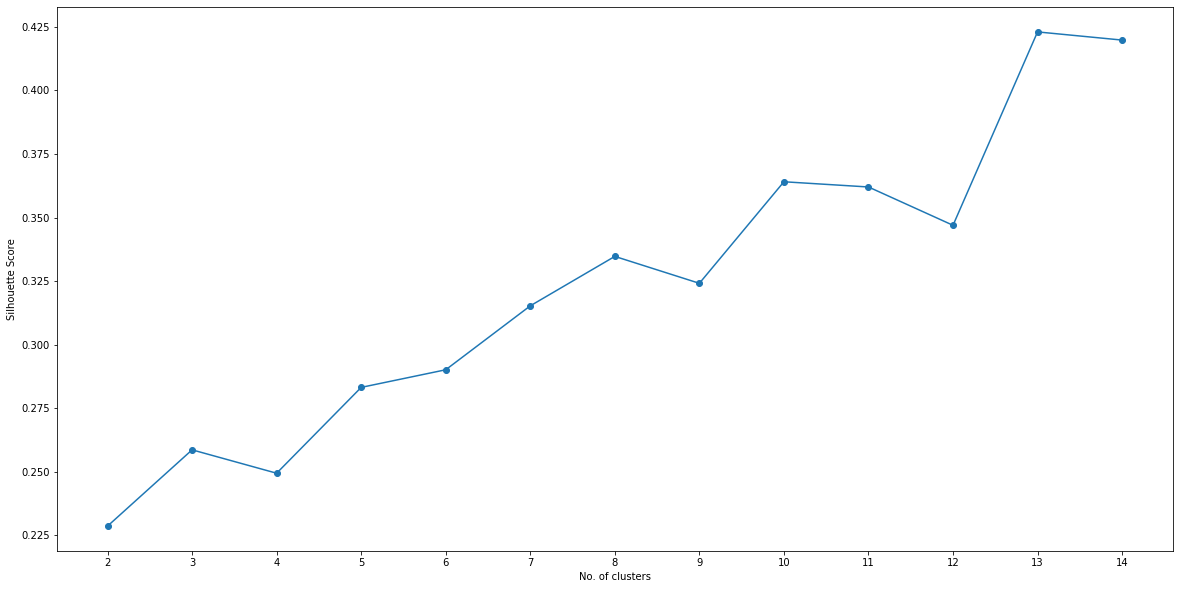

In [29]:
plot(max_range , scores, "No. of clusters", "Silhouette Score")

### Using the Ellbow Methode to get best value for number of clusters
We see that 4 is the best number of clusters for our case. Two or three cluster would generalize too much. More clusters would overfit.

In [30]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 1, 2, 2, 3, 2, 0, 3])

In [31]:
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [32]:
bl_final = coordinates_neigh
bl_final = bl_final.join(district_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')
bl_final.dropna(inplace = True)
bl_final['Cluster Labels'] = bl_final['Cluster Labels'].astype(int)
bl_final.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Mitte,52.517885,13.404060,3,Mediterranean Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
1,Tiergarten,52.509778,13.357260,3,German Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
3,Moabit,52.530102,13.342542,1,Vegetarian / Vegan Restaurant,German Restaurant,Italian Restaurant,Central and South American Food,Seafood Restaurant
4,Hansaviertel,52.519123,13.341872,1,Oriental Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Italian Restaurant
5,Gesundbrunnen,52.550920,13.384846,1,Oriental Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Mediterranean Restaurant


In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_clusters)

# Setup color scheme for different clusters
x = np.arange(bl_clusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(bl_final['Latitude'], bl_final['Longitude'], bl_final['Neighborhoods'], 
                                  bl_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

## 5. Examine Clusters



### First cluster (red marks) is best for getting mainly Asian Food

In [34]:
val = 1
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Heinersdorf,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
14,Pankow,Oriental Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Mediterranean Restaurant
20,Wilhelmsruh,Central and South American Food,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
21,Charlottenburg,Asian Restaurant,Oriental Restaurant,Italian Restaurant,Doner Restaurant,Amarican Restaurant& Fast Food
22,Wilmersdorf,Asian Restaurant,Mediterranean Restaurant,Italian Restaurant,Doner Restaurant,Seafood Restaurant
37,Steglitz,Asian Restaurant,Doner Restaurant,Oriental Restaurant,Mediterranean Restaurant,German Restaurant
43,Wannsee,Asian Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
45,Friedenau,Asian Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
47,Mariendorf,Mediterranean Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
58,Johannisthal,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant


### Second cluster (purple marks) you have mainly Oriantal Resaurants or Doner Places

In [36]:
val = 2
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Moabit,Vegetarian / Vegan Restaurant,German Restaurant,Italian Restaurant,Central and South American Food,Seafood Restaurant
4,Hansaviertel,Oriental Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Italian Restaurant
5,Gesundbrunnen,Oriental Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Mediterranean Restaurant
6,Friedrichshain,Oriental Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Seafood Restaurant
7,Kreuzberg,Oriental Restaurant,Mediterranean Restaurant,German Restaurant,Seafood Restaurant,Italian Restaurant
8,Prenzlauer Berg,Oriental Restaurant,Mediterranean Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant
10,Blankenburg,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Italian Restaurant
27,Halensee,Mediterranean Restaurant,Italian Restaurant,Asian Restaurant,Oriental Restaurant,German Restaurant
40,Zehlendorf,Italian Restaurant,Doner Restaurant,German Restaurant,Asian Restaurant,Amarican Restaurant& Fast Food
44,Schöneberg,Oriental Restaurant,Doner Restaurant,Asian Restaurant,German Restaurant,Eastern European Restaurant


### Third cluster (turquoise marks) has mainly Italian and Mediterranean Restaurants

In [37]:
val = 3
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,Buch,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
18,Niederschönhausen,Italian Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
23,Schmargendorf,Italian Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
25,Westend,Italian Restaurant,Amarican Restaurant& Fast Food,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
28,Spandau,Italian Restaurant,Doner Restaurant,Amarican Restaurant& Fast Food,Vegetarian / Vegan Restaurant,Seafood Restaurant
32,Gatow,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
38,Lichterfelde ...,Italian Restaurant,Eastern European Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant
48,Marienfelde,Italian Restaurant,Asian Restaurant,Amarican Restaurant& Fast Food,Vegetarian / Vegan Restaurant,Seafood Restaurant
59,Niederschöneweide,Mediterranean Restaurant,Italian Restaurant,Amarican Restaurant& Fast Food,Vegetarian / Vegan Restaurant,Seafood Restaurant
61,Adlershof,Mediterranean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant


### Fourth cluster (green marks) is good for mainly eating German cuisine or vegetarian/vegan food

In [40]:
val = 4
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Mitte,Mediterranean Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
1,Tiergarten,German Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
9,Weißensee,German Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
19,Rosenthal,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
24,Grunewald,German Restaurant,Italian Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant
39,Lankwitz,German Restaurant,Amarican Restaurant& Fast Food,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
41,Dahlem,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
51,Britz,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
68,Müggelheim,German Restaurant,Amarican Restaurant& Fast Food,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant
79,Malchow,German Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Oriental Restaurant,Mediterranean Restaurant
